In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as pltv
import gower
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [2]:
df = pd.read_pickle("../data/processed.pkl")
categorical_columns = df.select_dtypes(include=['category']).columns

In [3]:
# with open("../data/data_element_details.pkl", "rb") as file:
#     data_element_details = pickle.load(file)

In [4]:
# keep_cols = []
# for value in data_element_details.values():
#     if value['Section Name'] in ["Health Care Access", "Chronic Health Conditions"] and value['Label'] in df.columns:
#         keep_cols.append(value['Label'])
# df = df[keep_cols]

In [5]:
import pandas as pd
import prince

# Load the dataset
data = df

# Select the categorical columns for MCA
mca_columns = categorical_columns  # Replace with your categorical column names

# Create an instance of the MCA class
mca = prince.MCA(
    n_components=20,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Fit the MCA model to the data
mca.fit(data[mca_columns])

MCA(n_components=20, n_iter=3, random_state=42)

In [6]:
row_coords = mca.row_coordinates(df)

Attempt 0: k=2
silhouette_avg=0.2090653126222913
Attempt 1: k=3
silhouette_avg=0.1314862222950893
Attempt 2: k=4
silhouette_avg=0.13840744329449423
Attempt 3: k=5
silhouette_avg=0.08708099318942297
Attempt 4: k=6
silhouette_avg=0.12693514877907672
Attempt 5: k=7
silhouette_avg=0.14729497579250017
Attempt 6: k=8
silhouette_avg=0.15461236619680094
Attempt 7: k=9
silhouette_avg=0.1639716423560978
Attempt 8: k=10
silhouette_avg=0.15878741547086034
The optimal number of clusters based on Silhouette Score is 2


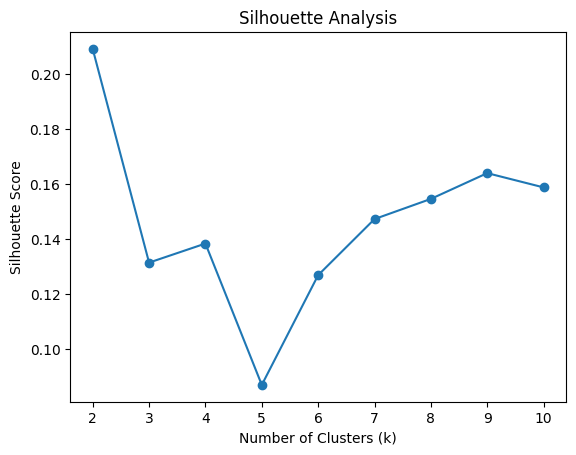

Cluster Labels (Optimal): [1 1 1 ... 0 0 0]
Cluster Centroids (Optimal): [[ 1.02415224e-01 -9.91664577e-02 -3.24725274e-02  1.87770060e-03
  -1.12219855e-02  3.37302608e-02  5.13078682e-03  1.13889029e-02
   1.37689467e-04 -1.35516951e-02 -7.13055064e-03 -9.22077531e-03
  -1.13862533e-02 -4.93103147e-04  4.31782309e-03 -6.92117131e-03
   5.62131163e-04  7.65882747e-03  8.54313700e-04 -3.18625135e-04]
 [-3.29378838e-01  3.78003307e-01  8.76998897e-02 -9.58811460e-03
   4.76249216e-02 -8.58796450e-02 -2.84941908e-02 -2.91584828e-02
   1.53861321e-02  2.63755195e-02 -9.46288057e-03  5.61833252e-02
   4.08343998e-03 -1.29173861e-02 -1.31569154e-02  1.23360515e-02
   9.75173653e-03  8.44490648e-03 -1.88608298e-02  9.60064533e-03]]


In [7]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Specify the range of k values to try
k_values = range(2, 11)

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Iterate over each k value
for i, k in enumerate(k_values):
    print(f"Attempt {i}: k={k}")
    # Create a MiniBatchKMeans object with the current k value
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
    
    # Fit the model to the MCA row coordinates
    mbk.fit(row_coords)
    
    # Get the cluster labels for each data point
    labels = mbk.labels_
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(row_coords, labels)
    print(f"silhouette_avg={silhouette_avg}")
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print("The optimal number of clusters based on Silhouette Score is", optimal_k)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Create a MiniBatchKMeans object with the optimal k value
mbk_optimal = MiniBatchKMeans(n_clusters=optimal_k, batch_size=100, random_state=42)

# Fit the model to the MCA row coordinates
mbk_optimal.fit(row_coords)

# Get the cluster labels for each data point
labels_optimal = mbk_optimal.labels_

# Get the cluster centers
centroids_optimal = mbk_optimal.cluster_centers_

# Print the cluster labels and centroids for the optimal clustering
print("Cluster Labels (Optimal):", labels_optimal)
print("Cluster Centroids (Optimal):", centroids_optimal)

In [8]:
with open('../data/silhouette_scores_2.pickle', 'wb') as handle:
    pickle.dump(silhouette_scores, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/mbk_optimal_2.pickle', 'wb') as handle:
    pickle.dump(mbk_optimal, handle, protocol=pickle.HIGHEST_PROTOCOL)